In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('/content/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [28]:
# Assuming 'Score' is the target variable and other columns are features
X = df.drop('Score', axis=1)
y = df['Score']

In [29]:
# Convert non-numeric columns to numerical representations (e.g., one-hot encoding)
X = pd.get_dummies(X, drop_first=True) # Example using one-hot encoding

In [30]:
# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [34]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.03150537970580877
R-squared: 0.9697274218465509


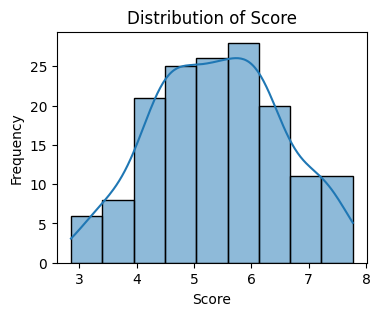

In [43]:
# Visualize the distribution of the target variable
plt.figure(figsize=(4, 3))
sns.histplot(y, kde=True)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

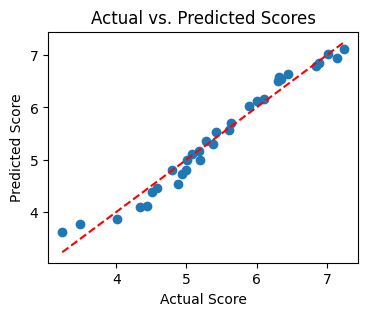

In [45]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Actual vs. Predicted Scores')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()

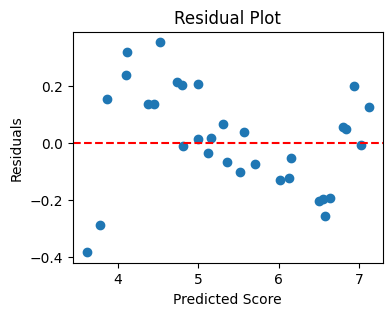

In [48]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(4, 3))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--') # Add horizontal line at 0
plt.show()